## 1. Imports

In [5]:
from PIL.Image import DecompressionBombError
import random
import matplotlib.pyplot as plt
import json
import numpy as np
import cv2
import praw,requests
import psaw
import datetime as dt
import os
import sys
import random
import imageio
import tensorflow as tf
from yolo import make_yolov3_model, WeightReader

## 2. Functions

In [2]:
#Checks if two images are identical, returns true if they are, returns true if a file is blank
def compare2images(original,duplicate):
    if original is None or duplicate is None:
        return True #delete emtpy pictures
    if original.shape == duplicate.shape:
        #print("The images have same size and channels")
        difference = cv2.subtract(original, duplicate)
        b, g, r = cv2.split(difference)
        if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
            return True
        else:
            return False
    else:
        return False

#A simple progress bar for transparency on the 20000 image processing tasks
def progress(purpose,currentcount, maxcount):
    sys.stdout.write('\r')
    sys.stdout.write("{}: {:.1f}%".format(purpose,(100/(maxcount-1)*currentcount)))
    sys.stdout.flush()

def listoffiles(dir):
    return [f for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f))]

#custom image data generator following this example https://www.pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/
def custom_file_image_generator(inputPath,bs,mode="train",aug=None, max = 1, frompath="picsnew"):
    f = open(inputPath, "r")
    while True:
        images = []
        labels = []
        while len(images)<bs:
            line = f.readline()
            if line == "":
                f.seek(0)
                line = f.readline()
                # if we are evaluating we should now break from our
                # loop to ensure we don't continue to fill up the
                # batch from samples at the beginning of the file
                if mode == "eval":
                    break
            label = int(line.split(".")[0].split("_")[0])
            stripped = line.strip('\n')
            image = plt.imread(f"{frompath}{stripped}")
            #Removes alpha channel
            image = np.float32(image)[:,:,:3]
            #Neceesary resizing to avoid PIL pixel cap
            while image.shape[0] * image.shape[1]>89478485:
                image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)
            cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
            images.append(image)
            labels.append(label/max)
        labels = np.asarray(labels).T
        yield(np.asarray(images),labels)

## 3. Set up Reddit api for downloading images

In [3]:
#Set up API keys from .gitignored file
with open('config.json') as config_file:
    config = json.load(config_file)['keys']

# Sign into Reddit using API Key
reddit = praw.Reddit(user_agent="Downloading images from r/art for a machine learning project",
                     client_id=config['client_id'],
                     client_secret=config['client_secret'],
                     username=config['username'],
                     password=config['password'])

## 4. Choose a suitable image from Reddit using PSAW and PRAW

Looking for posts using Pushshift...
25yzge score is good: 3197
Post 25yzge with 3197 found


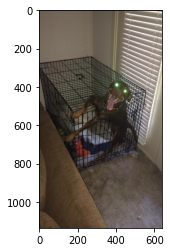

In [5]:
#Choose a random day to download a picture from
Jan2010 = int(dt.datetime(2010,1,1).timestamp())
today = int(dt.datetime.today().timestamp())
randomday = random.randint(Jan2010,today)
#Pass a PRAW instance into PSAW so that scores are available
api = psaw.PushshiftAPI(reddit)

#Number of posts to examine at a time
n = 1000

print("Looking for posts using Pushshift...")
#this step takes a while

#Deleted pictures for comparison
deletedtemplate = cv2.imread("exampledeleted.jpg")
deletedtemplate2 = cv2.imread("exampledeleted2.jpg")
found = False
image = [0,0,1,1]
while not found:
    posts = list(api.search_submissions(before = randomday, subreddit='pics', limit = n))
    #Post should be somewhat popular
    for post in posts:
        if post.score>1000:
            print(f"{post.id} score is good: {post.score}")
            url = (post.url)
            try:
                #use requests to get image
                image = imageio.imread(url)
                if compare2images(deletedtemplate,image) or compare2images(deletedtemplate2,image):
                    print(f"{post.id} is deleted unfortunately")
                    pass
                else:
                    print(f"Post {post.id} with {post.score} found")
                    found=True
                    break
            except (
                requests.ConnectionError,
                requests.exceptions.ReadTimeout,
                requests.exceptions.Timeout,
                requests.exceptions.ConnectTimeout,
            ) as e:
                print(e)
plt.imshow(image)


In [6]:
model = make_yolov3_model()
# load the model weights
weight_reader = WeightReader('models/yolov3.weights')
# set the model weights into the model
weight_reader.load_weights(model)
# save the model to file
model.save('models/model.h5')


loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

In [1]:
img = cv2.imread("pic.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

NameError: name 'cv2' is not defined